# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [36]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/simar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [37]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("news_api")

In [38]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [39]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q = "bitcoin AND Bitcoin AND BTC",
    language = "en",
    page_size=50,
    sort_by = "relevancy"
)
# Print total articles
print(f"Total articles about bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

Total articles about bitcoin: 1414


{'source': {'id': None, 'name': 'Gizmodo.com'},
 'author': 'John Biggs',
 'title': 'Bitcoin Could Hit $20K Again But This Time No One Cares',
 'description': 'If you’ve been watching the crypto markets over the past few weeks you’ll have noticed something special: bitcoin, everyone’s favorite decentralized digital currency based on hype, lies, and general malfeasance, is about to hit $20,000—if it can break through…',
 'url': 'https://gizmodo.com/bitcoin-could-hit-20k-again-but-this-time-no-one-cares-1845757159',
 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/puaxex5okv9olikadyqf.jpg',
 'publishedAt': '2020-11-25T23:00:00Z',
 'content': 'If youve been watching the crypto markets over the past few weeks youll have noticed something special: bitcoin, everyones favorite decentralized digital currency based on hype, lies, and general mal… [+2490 chars]'}

In [40]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum AND Ethereum AND ETH",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about enthereum: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]

Total articles about enthereum: 469


{'source': {'id': 'reuters', 'name': 'Reuters'},
 'author': 'Reuters Staff',
 'title': 'Bitcoin rises to three-year peak, all-time high in sight - Reuters UK',
 'description': 'Bitcoin <BTC=BTSP> rose to a nearly three-year high on Friday, as investors continued to scoop the virtual currency on expectations it could well exceed its all-time peak of just under $20,000 (15,060.24 pounds).',
 'url': 'https://uk.reuters.com/article/uk-crypto-currencies-idUKKBN2801WH',
 'urlToImage': 'https://static.reuters.com/resources/r/?m=02&d=20201120&t=2&i=1541908846&r=LYNXMPEGAJ0ZP&w=800',
 'publishedAt': '2020-11-20T15:01:00Z',
 'content': 'By Reuters Staff\r\nA representation of virtual currency Bitcoin is seen in this illustration taken November 19, 2020. REUTERS/Dado Ruvic/Illustration\r\nNEW YORK (Reuters) - Bitcoin BTC=BTSP rose to a n… [+1407 chars]'}

In [41]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2020-11-25,If youve been watching the crypto markets over...,0.4404,0.152,0.075,0.773
1,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950
2,2020-11-20,By Reuters Staff\r\nA representation of virtua...,0.0000,0.000,0.000,1.000
3,2020-11-20,By Reuters Staff\r\nA representation of virtua...,0.0000,0.000,0.000,1.000
4,2020-11-17,FILE PHOTO: Representations of virtual currenc...,0.0000,0.000,0.000,1.000


In [42]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2020-11-20,By Reuters Staff\r\nA representation of virtua...,0.0000,0.000,0.000,1.000
1,2020-11-20,By Reuters Staff\r\nA representation of virtua...,0.0000,0.000,0.000,1.000
2,2020-11-26,The New York Times is (probably) about to publ...,0.0000,0.000,0.000,1.000
3,2020-11-18,Each comment or response costs a tiny ETH fee ...,0.5106,0.088,0.000,0.912
4,2020-11-17,"LONDON (Reuters) - Bitcoin passed $17,000 on T...",0.2263,0.075,0.047,0.878


In [43]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,45.000000,45.000000,45.000000,45.000000
mean,0.221396,0.076578,0.026067,0.897333
std,0.337697,0.067154,0.035923,0.073406
min,-0.526700,0.000000,0.000000,0.743000
25%,0.000000,0.000000,0.000000,0.861000
50%,0.202300,0.070000,0.000000,0.903000
75%,0.493900,0.124000,0.060000,0.945000
max,0.840200,0.257000,0.115000,1.000000


In [44]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,97.000000,97.000000,97.000000,97.000000
mean,0.234770,0.073928,0.016742,0.909320
std,0.339154,0.074557,0.036415,0.084086
min,-0.526700,0.000000,0.000000,0.646000
25%,0.000000,0.000000,0.000000,0.847000
50%,0.177900,0.064000,0.000000,0.925000
75%,0.557400,0.133000,0.000000,1.000000
max,0.880500,0.286000,0.142000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Ethereum

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [45]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [46]:
# Expand the default stopwords list if necessary


In [47]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in words]
    sw = set(stopwords.words('english'))
    tokens = [word.lower() for word in lem if word.lower() not in sw]

    
    return tokens

In [48]:
# Create a new tokens column for Bitcoin
bitcoin_df['tokens']=[tokenizer(word) for word in bitcoin_df['text']]
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-11-25,If youve been watching the crypto markets over...,0.4404,0.152,0.075,0.773,"[youve, watching, crypto, market, past, week, ..."
1,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950,"[november, absolutely, massive, twomonth, rall..."
2,2020-11-20,By Reuters Staff\r\nA representation of virtua...,0.0000,0.000,0.000,1.000,"[reuters, staffa, representation, virtual, cur..."
3,2020-11-20,By Reuters Staff\r\nA representation of virtua...,0.0000,0.000,0.000,1.000,"[reuters, staffa, representation, virtual, cur..."
4,2020-11-17,FILE PHOTO: Representations of virtual currenc...,0.0000,0.000,0.000,1.000,"[file, photo, representations, virtual, curren..."


In [49]:
# Create a new tokens column for Ethereum
ethereum_df['tokens']=[tokenizer(word) for word in ethereum_df['text']]
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-11-20,By Reuters Staff\r\nA representation of virtua...,0.0000,0.000,0.000,1.000,"[reuters, staffa, representation, virtual, cur..."
1,2020-11-20,By Reuters Staff\r\nA representation of virtua...,0.0000,0.000,0.000,1.000,"[reuters, staffa, representation, virtual, cur..."
2,2020-11-26,The New York Times is (probably) about to publ...,0.0000,0.000,0.000,1.000,"[new, york, times, probably, publish, story, c..."
3,2020-11-18,Each comment or response costs a tiny ETH fee ...,0.5106,0.088,0.000,0.912,"[comment, response, cost, tiny, eth, fee, ethe..."
4,2020-11-17,"LONDON (Reuters) - Bitcoin passed $17,000 on T...",0.2263,0.075,0.047,0.878,"[london, reuters, bitcoin, passed, tuesday, to..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [50]:
from collections import Counter
from nltk import ngrams

In [51]:
# Generate the Bitcoin N-grams where N=2
bitcoin_text_all = []
for token in bitcoin_df['tokens']:
    for text in token:
        bitcoin_text_all.append(text)
bitcoin_bigram_counts = Counter(ngrams(bitcoin_text_all, n=2))
bitcoin_bigram_counts.most_common(10)

[(('char', 'bitcoin'), 9),
 (('york', 'reuters'), 6),
 (('reuters', 'bitcoin'), 5),
 (('char', 'sydney'), 5),
 (('sydney', 'reuters'), 5),
 (('digital', 'currency'), 4),
 (('reuters', 'safehaven'), 4),
 (('safehaven', 'japanese'), 4),
 (('japanese', 'yen'), 4),
 (('oneweek', 'high'), 4)]

In [52]:
# Generate the Ethereum N-grams where N=2
ethereum_text_all = []
for token in ethereum_df['tokens']:
    for text in token:
        ethereum_text_all.append(text)
ethereum_bigram_counts = Counter(ngrams(ethereum_text_all, n=2))
ethereum_bigram_counts.most_common(10)

[(('char', 'bitcoin'), 10),
 (('ether', 'eth'), 9),
 (('char', 'ethereum'), 8),
 (('decentralized', 'finance'), 7),
 (('deposit', 'contract'), 6),
 (('bitcoin', 'btc'), 6),
 (('ethereum', 'eth'), 6),
 (('reuters', 'bitcoin'), 5),
 (('beacon', 'chain'), 5),
 (('finance', 'defi'), 5)]

In [53]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [54]:
# Get the top 10 words for Bitcoin
token_count(bitcoin_text_all)

[('char', 45),
 ('bitcoin', 32),
 ('reuters', 16),
 ('currency', 13),
 ('ha', 13),
 ('price', 11),
 ('market', 7),
 ('york', 7),
 ('high', 7),
 ('dollar', 7)]

In [55]:
# Get the top 10 words for Ethereum
token_count(ethereum_text_all)

[('char', 97),
 ('ethereum', 57),
 ('bitcoin', 40),
 ('eth', 34),
 ('ha', 25),
 ('price', 20),
 ('ethereums', 16),
 ('ether', 15),
 ('btc', 14),
 ('cryptocurrency', 13)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [57]:
def listToString(s):    
    # initialize an empty string 
    str1 = " " 
    # return string   
    return (str1.join(s))

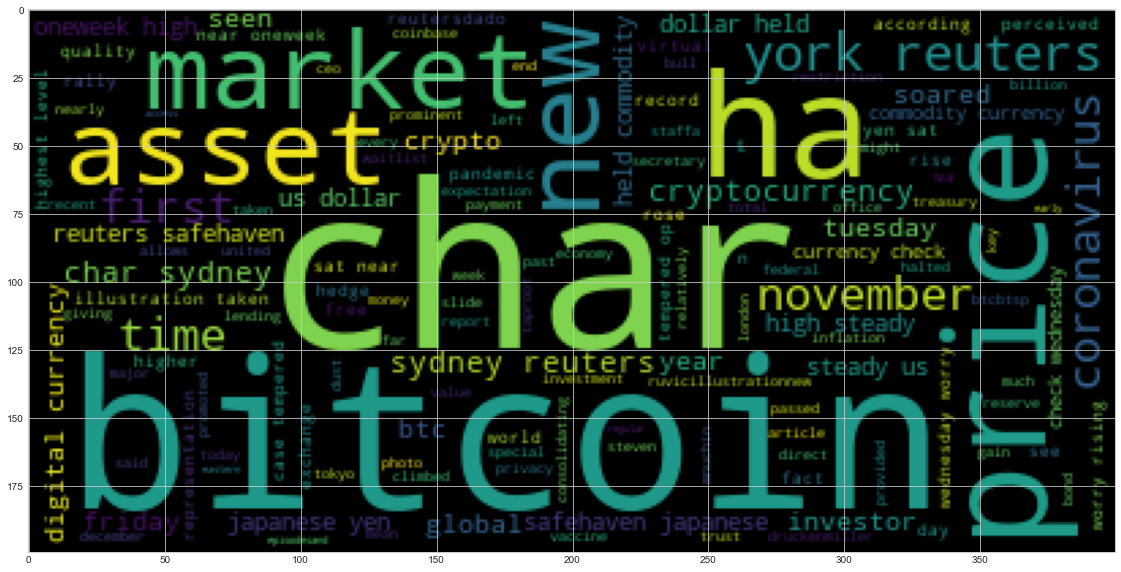

In [58]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(listToString(bitcoin_text_all))
plt.imshow(wc)

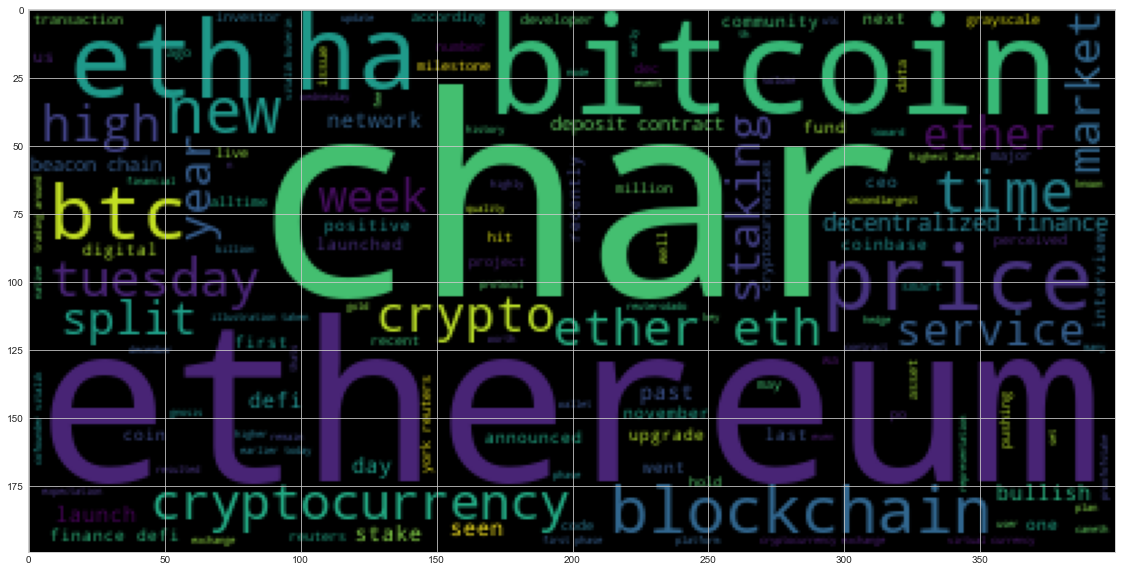

In [59]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(listToString(ethereum_text_all))
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [60]:
import spacy
from spacy import displacy

In [61]:
# Optional - download a language model for SpaCy
#!python -m spacy download en_core_web_sm
#! pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

In [62]:
# Load the spaCy model
import en_core_web_sm
nlp = en_core_web_sm.load()

/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/spacy/util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.4). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


---
### Bitcoin NER

In [74]:
# Concatenate all of the Bitcoin text together
bitcoin_big_string = listToString(bitcoin_df['text'])

In [72]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_big_string)

# Add a title to the document
bitcoin_doc.user_data['title'] = 'Bitcoin NER'

In [73]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [66]:
# List all Entities
for ent in bitcoin_doc.ents:
    print(ent.text, ent.label_)

the past few weeks DATE
November 2017 DATE
two-month DATE
Bitcoin PERSON
10,000 MONEY
first ORDINAL
the next 20 days DATE
19,665 MONEY
+6738 ORG
Reuters ORG
Bitcoin PERSON
November 19, 2020 DATE
REUTERS/Dado Ruvic/Illustration ORG
NEW YORK GPE
Reuters ORG
BTC ORG
BTSP PERSON
Reuters ORG
Bitcoin PERSON
November 19, 2020 DATE
REUTERS/Dado Ruvic/Illustration ORG
NEW YORK GPE
Reuters ORG
BTC ORG
BTSP PERSON
Bitcoin PERSON
March 13, 2020 DATE
REUTERS/Dado Ruvic//File Photo
Future of Money ORG
Tom Wilson PERSON
Tom Wilson PERSON
Gertrude Chavez-Dreyfuss PERSON
LONDON GPE
NEW YORK GPE
Reuters ORG
Tuesday DATE
December 2017 DATE
LONDON GPE
Reuters ORG
17,000 MONEY
Tuesday DATE
this year DATE
LONDON GPE
NEW YORK GPE
Reuters ORG
Tuesday DATE
December 2017 DATE
NEW YORK GPE
Reuters ORG
Grayscale ORG
Wednesday DATE
a record $10.4 billion MONEY
today DATE
first ORDINAL
Elon Musk PERSON
Earth LOC
nearly three years DATE
Bitcoin PERSON
over $15k MONEY
BTC ORG
New Bitcoin PRODUCT
Zoom PERSON
Amazon GP

---

### Ethereum NER

In [67]:
# Concatenate all of the Ethereum text together
ethereum_big_string = listToString(ethereum_df['text'])

In [68]:
# Run the NER processor on all of the text
ethereum_doc = nlp(ethereum_big_string)

# Add a title to the document
ethereum_doc.user_data['title'] = 'Ethereum NER'

In [69]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [70]:
# List all Entities
for ent in ethereum_doc.ents:
    print(ent.text, ent.label_)

Reuters ORG
Bitcoin PERSON
November 19, 2020 DATE
REUTERS/Dado Ruvic/Illustration ORG
NEW YORK GPE
Reuters ORG
BTC ORG
BTSP PERSON
Reuters ORG
Bitcoin PERSON
November 19, 2020 DATE
REUTERS/Dado Ruvic/Illustration ORG
NEW YORK GPE
Reuters ORG
BTC ORG
BTSP PERSON
The New York Times ORG
Coinbase ORG
+3993 NORP
0.00011 CARDINAL
Ethereum LOC
LONDON GPE
Reuters ORG
17,000 MONEY
Tuesday DATE
this year DATE
LONDON GPE
NEW YORK GPE
Reuters ORG
Tuesday DATE
December 2017 DATE
Bitcoin PERSON
March 13, 2020 DATE
REUTERS/Dado Ruvic//File Photo
Future of Money ORG
Tom Wilson PERSON
Tom Wilson PERSON
Gertrude Chavez-Dreyfuss PERSON
LONDON GPE
NEW YORK GPE
Reuters ORG
Tuesday DATE
December 2017 DATE
Bitcoin PERSON
Wednesday DATE
2.0 CARDINAL
Bitcoin PERSON
BTC ORG
around $15,694 MONEY
21:00 UTC TIME
4 p.m. ET TIME
2.6% PERCENT
24 CARDINAL
One CARDINAL
2.0 CARDINAL
first ORDINAL
Ethereum 2.0 FAC
Ethereum’s ORG
first ORDINAL
2.0 CARDINAL
385,440 CARDINAL
Valid Points ORG
Will Foxley PERSON
weekly DATE
C

---